# Generation of samples & test shoebox simulation

In this workbook, we will,
1. generate a matrix of storage vectors from the resstock sample output 
2. sample the manual parameters.
3. explore the distribution of data
4. generate shoeboxes from a small portion of the data
5. simulate the shoeboxes

### Setup and imports

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px
import seaborn as sns
sns.set(style="darkgrid")

# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

Initialize the schema

In [4]:
from schema import Schema, ShoeboxGeometryParameter, BuildingTemplateParameter, WhiteboxSimulation
schema = Schema()

c:\Users\zoele\anaconda3\envs\ml-for-bem\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Generate new design vectors


First, we will upload the raw outputs from the NREL ResStock sampling scheme.

In [13]:
from nrel_uitls import ResStockConfiguration

basepath = os.path.dirname(os.getcwd())
filepath = os.path.join(basepath, "NREL", "data", "ResStock", "resstock_filtered.csv")
citypath = os.path.join(os.getcwd(), "data", "city_map.json")
resstock_filtered = pd.read_csv(filepath, index_col=0)
resstock_samples = ResStockConfiguration(resstock_filtered, citypath)
sample_df = resstock_samples.get_template_df()
sample_df.head()

Dropped 17 samples while cleaning. Now there are 591 samples.


,bldg_id,archetype,vintage,climate_zone,base_epw,window_type,wwr,heating_setpoint,cooling_setpoint,Infiltration,...,FacadeMass,SlabMass,FacadeRValue,RoofRValue,PartitionRValue,SlabRValue,has_electric_heating,heating_cop,has_cooling,cooling_cop
0,0.0,3.0,1909.0,7.0,0.0,0.0,0.15,20.000000,25.555556,1.000000,...,2971.8,3964.177598,0.272143,2.561681,0.0,2.561681,0.0,0.900000,1.0,3.0
1,0.0,2.0,1868.0,9.0,1.0,1.0,0.12,20.000000,18.333333,1.666667,...,2971.8,5261.902149,0.272143,5.555693,0.0,5.555693,0.0,0.760000,1.0,3.0
2,0.0,0.0,2004.0,4.0,2.0,3.0,0.09,25.555556,21.111111,0.666667,...,280416.0,2971.800000,3.385190,0.272143,0.0,0.272143,1.0,2.930556,1.0,3.0
3,0.0,0.0,2004.0,7.0,3.0,2.0,0.12,22.222222,21.111111,0.466667,...,2971.8,2971.800000,3.618392,0.272143,0.0,0.272143,0.0,0.800000,1.0,3.0
4,0.0,0.0,1861.0,9.0,4.0,0.0,0.18,21.111111,23.888889,0.666667,...,2971.8,2971.800000,0.272143,0.272143,0.0,0.272143,0.0,0.800000,1.0,3.0


Let's look at what parameters are described by ResStock

In [7]:
resstock_samples.columns

['bldg_id',
 'archetype',
 'vintage',
 'climate_zone',
 'base_epw',
 'window_type',
 'wwr',
 'heating_setpoint',
 'cooling_setpoint',
 'Infiltration',
 'dhw_flow',
 'PeopleDensity',
 'LightingPowerDensity',
 'EquipmentPowerDensity',
 'FacadeMass',
 'SlabMass',
 'FacadeRValue',
 'RoofRValue',
 'PartitionRValue',
 'SlabRValue',
 'has_electric_heating',
 'heating_cop',
 'has_cooling',
 'cooling_cop']

Some of these will directly match up with the schema parameters...

In [7]:
schema.parameter_names

['batch_id',
 'variation_id',
 'program_type',
 'vintage',
 'climate_zone',
 'base_epw',
 'width',
 'height',
 'facade_2_footprint',
 'perim_2_footprint',
 'roof_2_footprint',
 'footprint_2_ground',
 'shading_fact',
 'wwr',
 'orientation',
 'HeatingSetpoint',
 'CoolingSetpoint',
 'HeatingCoeffOfPerf',
 'CoolingCoeffOfPerf',
 'FlowRatePerFloorArea',
 'LightingPowerDensity',
 'EquipmentPowerDensity',
 'PeopleDensity',
 'Infiltration',
 'FacadeMass',
 'RoofMass',
 'SlabMass',
 'FacadeRValue',
 'RoofRValue',
 'SlabRValue',
 'WindowSettings',
 'schedules_seed',
 'schedules']

Text(0, 0.5, 'Heating')

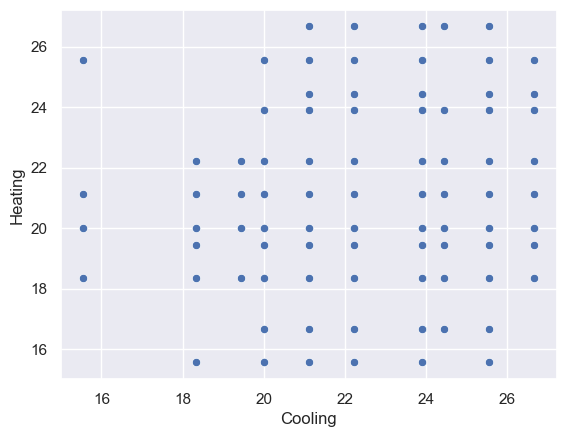

In [14]:
sns.scatterplot(
    x=sample_df['cooling_setpoint'],
    y=sample_df['heating_setpoint'])
plt.xlabel("Cooling")
plt.ylabel("Heating")

<Axes: xlabel='Infiltration', ylabel='Count'>

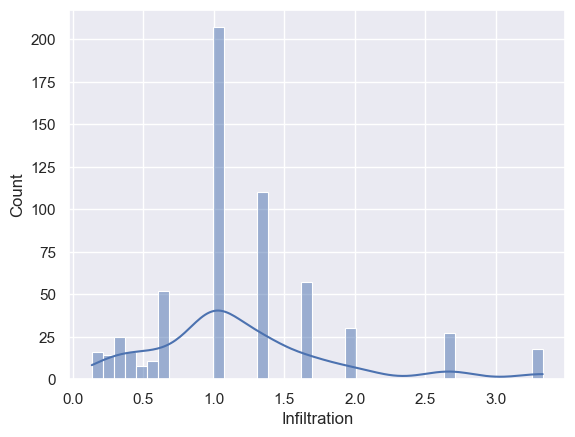

In [15]:
sns.histplot(sample_df["Infiltration"], kde=True)

<Axes: xlabel='EquipmentPowerDensity', ylabel='Count'>

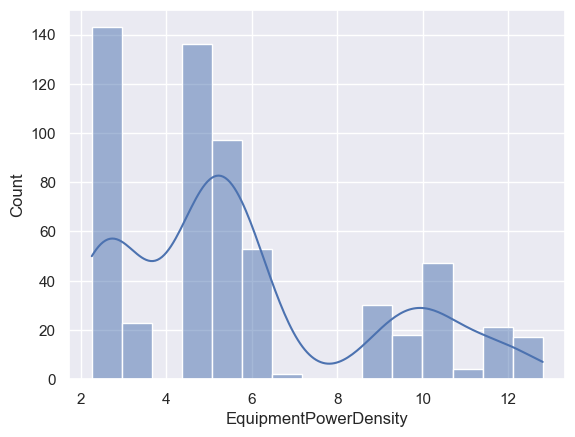

In [16]:
sns.histplot(sample_df["EquipmentPowerDensity"], kde=True)

<Axes: xlabel='LightingPowerDensity', ylabel='Count'>

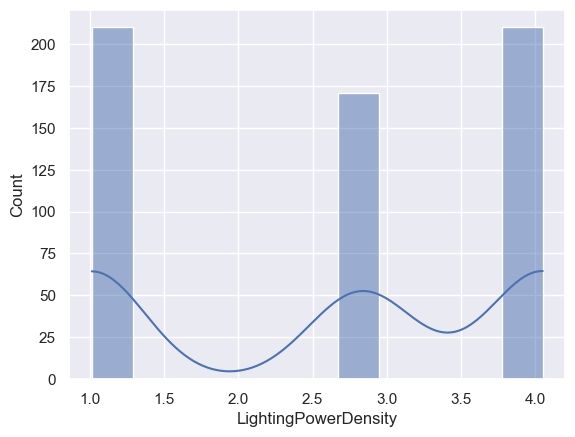

In [17]:
sns.histplot(sample_df["LightingPowerDensity"], kde=True)

In [24]:
resstock_filtered[resstock_filtered['City']=="NY, New York"].shape

(40, 134)

<Axes: xlabel='base_epw', ylabel='Count'>

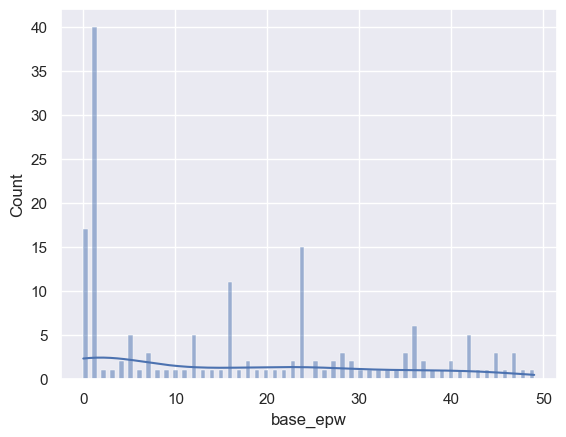

In [22]:
sns.histplot(sample_df[sample_df["base_epw"] < 50]["base_epw"], kde=True, bins = 100)

<Axes: xlabel='archetype', ylabel='Count'>

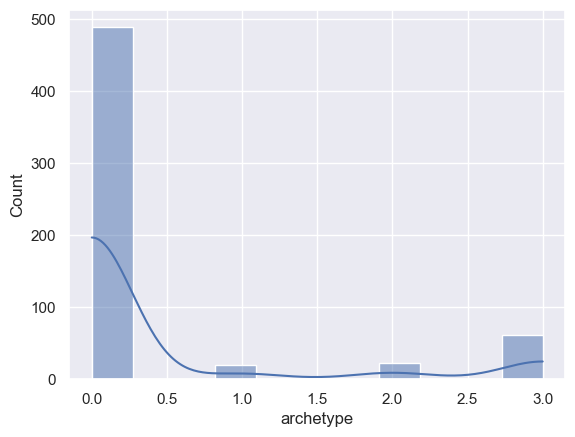

In [25]:
sns.histplot(sample_df["archetype"], kde=True)

<Axes: xlabel='climate_zone', ylabel='Count'>

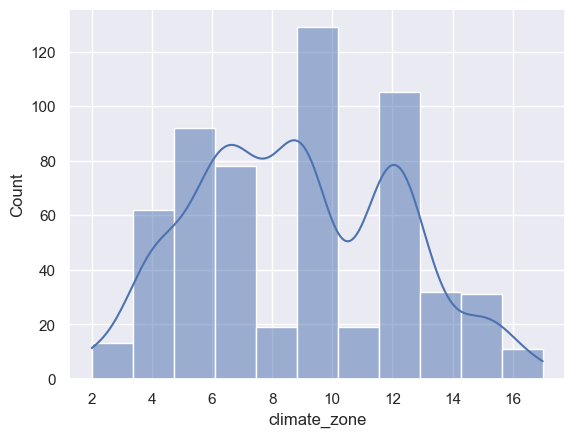

In [19]:
sns.histplot(sample_df["climate_zone"], kde=True)

<Axes: ylabel='Count'>

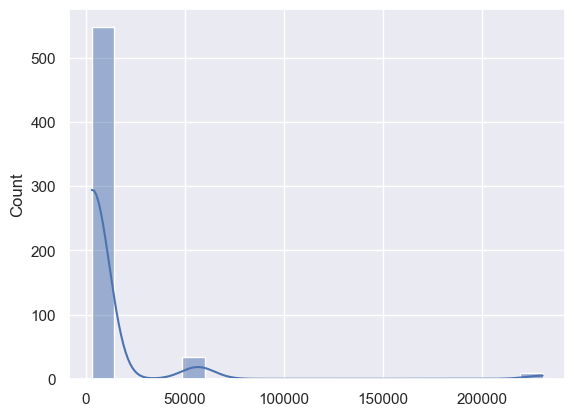

In [20]:
i = resstock_samples.columns.index('RoofMass')
sns.histplot(sample_vector[:, i], kde=True, bins = 20)

<Axes: ylabel='Count'>

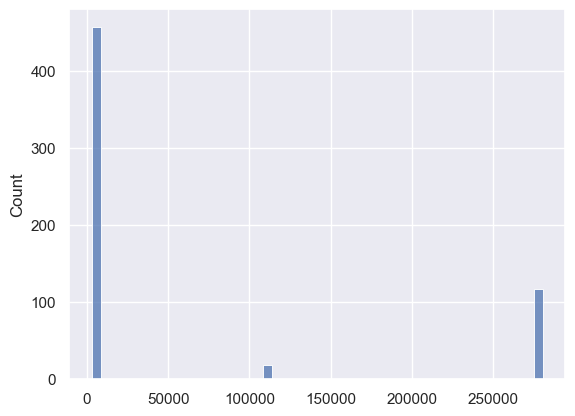

In [24]:
i = resstock_samples.columns.index('FacadeMass')
sns.histplot(sample_vector[:, i], bins = 50)

In [26]:
from archetypal import UmiTemplateLibrary

p = "C:/Users/zoele/Git_Repos/ml-for-building-energy-modeling/ml-for-bem/data/template_libs/BostonTemplateLibrary.json"
lib = UmiTemplateLibrary.open(p)


In [21]:
df.RoofMass.describe()

count       591.000000
mean       9815.702576
std       30137.409823
min        2971.800000
25%        2971.800000
50%        2971.800000
75%        2971.800000
max      230428.800000
Name: RoofMass, dtype: float64

In [31]:
for bt in lib.BuildingTemplates:
    print(bt.Name)
    cons= bt.Perimeter.Constructions.Roof
    print(cons)
    # print(cons.r_value)

    print(cons.heat_capacity_per_unit_wall_area)
    for layer in cons.Layers:
        print(layer, layer.heat_capacity, layer.Material.SpecificHeat)

B_Off_0
39:B_Off_Rof_0
751740.0
20:B_XPS_Board with thickness of 0.100 m 4800.0 1200.0
14:B_Concrete_MC_Light with thickness of 0.150 m 327600.0 1040.0
13:B_Concrete_RC_Dense with thickness of 0.200 m 403200.0 840.0
18:B_Air_Floor_15cm with thickness of 0.150 m 180.0 1000.0
16:B_Gypsum_Board with thickness of 0.020 m 15960.0 840.0
B_Ret_0
40:B_Ret_Rof_0
751740.0
20:B_XPS_Board with thickness of 0.100 m 4800.0 1200.0
14:B_Concrete_MC_Light with thickness of 0.150 m 327600.0 1040.0
13:B_Concrete_RC_Dense with thickness of 0.200 m 403200.0 840.0
18:B_Air_Floor_15cm with thickness of 0.150 m 180.0 1000.0
16:B_Gypsum_Board with thickness of 0.020 m 15960.0 840.0
B_Res_0_Masonry
38:B_Res_Rof_0
255993.6
14:B_Concrete_MC_Light with thickness of 0.100 m 218400.0 1040.0
23:B_Plywood_Board with thickness of 0.020 m 20304.0 1880.0
24:B_Fiberglass_Batts with thickness of 0.120 m 1209.6 840.0
18:B_Air_Floor_15cm with thickness of 0.100 m 120.0 1000.0
16:B_Gypsum_Board with thickness of 0.020 m 15960

In [10]:
sample_vector[:, i]

array([20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488189, 20472440.94488189,
       20472440.94488189, 20472440.94488

<Axes: ylabel='Count'>

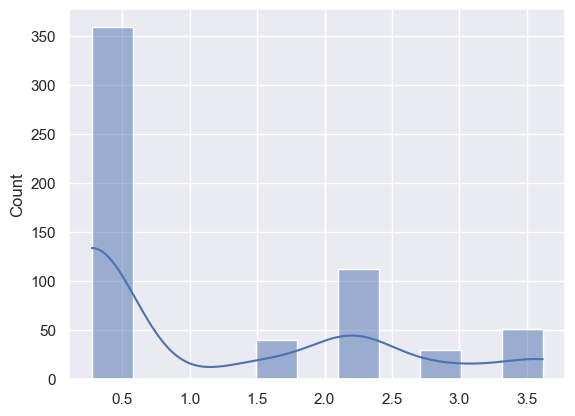

In [18]:
i = resstock_samples.columns.index('FacadeRValue')
sns.histplot(sample_vector[:, i], kde=True)